In [21]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
import package_DBR
import pandas as pd
import Nath_package_grp_Trio
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process,PID, Bode
from Nath_package_grp_Trio import Compute_Time,Compute_All_Methods,leadLag, PID_RT, actionP, actionI, actionD,margin
from importlib import reload
package_DBR = reload(package_DBR)
Nath_package_grp_Trio = reload(Nath_package_grp_Trio)





SOPDT values : comparing phase/margin gains 

In [17]:
#  Frequency Domain of PV signal
omega = np.logspace(-3,2,10000) # frequency vector



Broida = Process({})
Broida.parameters['Kp'] = 0.378
Broida.parameters['Tlag1'] = 185
Broida.parameters['theta'] = 10
Bs = Bode(Broida,omega,Show=False)




Grinten = Process({})
Grinten.parameters['Kp'] = 0.378
Grinten.parameters['Tlag1'] = -1.421
Grinten.parameters['Tlag2'] = 44.71
Grinten.parameters['theta'] = 10.674

Gs = Bode(Grinten,omega,Show=False)


C = PID({})
C.parameters['Kc'] = 1.9
C.parameters['Ti'] = 110
C.parameters['Td']= 10
C.parameters['Tfd'] = 10



print("Margin caracteristics of Broida model : ")
margin(Bs,C,omega,Show=False)
print('\n')

print("Margin caracteristics of Grinten model : ")
margin(Gs,C,omega,Show=False)


Margin caracteristics of Broida model : 
Gain margin : 28.213686843832384 dB at the ultimate frequency : 0.18018787872878772 rad/s
Phase margin :  73.66087458304114 ° at the crossover frequency : 0.0052610460986019765 rad/s


Margin caracteristics of Grinten model : 
Gain margin : 17.064502686543634 dB at the ultimate frequency : 0.20101585942252212 rad/s
Phase margin :  109.38585962640039 ° at the crossover frequency : 0.007790927427532252 rad/s


Comparing Two Process in time domain

Process P in red
Process Q in blue


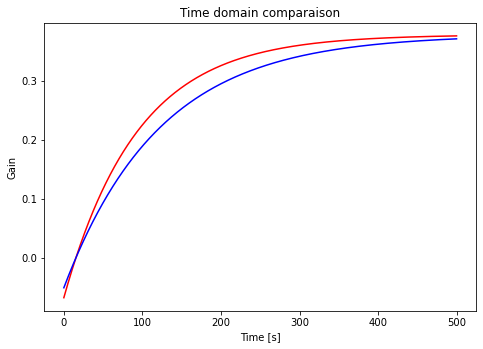

In [22]:
#Time Domain of Grinten and Broida models
# Time domain for Broida and Grinten

#Parameters from "identification_FOPDT" :

#LEGENDE DES GRAPHES ?
P = Process({})
P.parameters['Kp'] = 0.378
P.parameters['Tlag1'] = 93.5
P.parameters['theta'] = 15.397


#
Q = Process({})
Q.parameters['Kp'] = 0.378
Q.parameters['Tlag1'] = 122
Q.parameters['theta'] = 15.397


print("Process P in red")
print("Process Q in blue")
Compute_Time(P,Q,omega)



# Parameters from identification SOPDT
P.parameters['Kp'] = 0.375
P.parameters['Tlag1'] = 102.999
P.parameters['Tlag2'] = 11.649
P.parameters['theta'] = 2.624


Q = Process({})
Q.parameters['Kp'] = 0.375
Q.parameters['Tlag1'] = 102.999
Q.parameters['Tlag2'] = 11.649
Q.parameters['theta'] = 2.624

    


Frequency Domain Comparaison of the 3 models : Broida,Grinten,Strejc

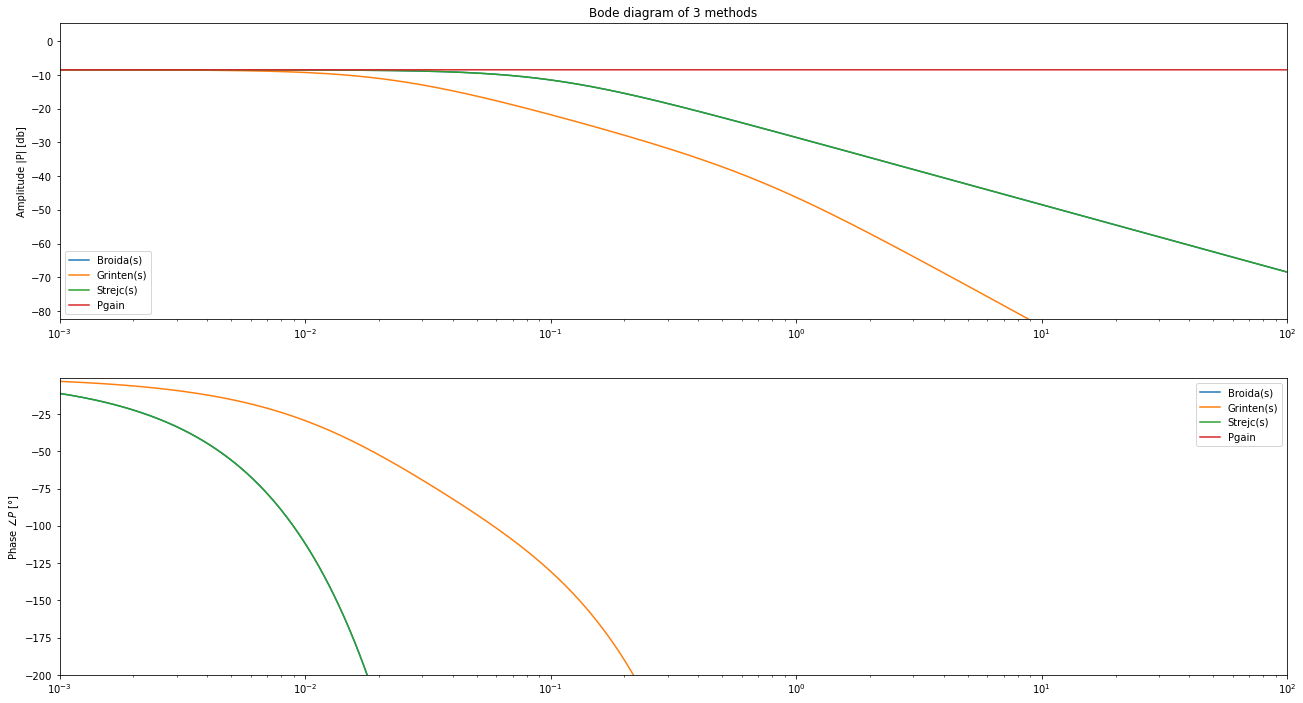

In [ ]:
omega = np.logspace(-3,2,10000)
B = Process({})
B.parameters['Kp'] = 0.378
B.parameters['Tlag1'] = 10
B.parameters['theta'] = 185


G = Process({})
G.parameters['Kp'] = 0.378
G.parameters['Tlag1'] = -1.421
G.parameters['Tlag2'] = 44.71
G.parameters['theta'] = 10.674


S = Process({})
S.parameters['Kp'] = 0.378
S.parameters['Tlag1'] = 10
S.parameters['theta'] = 185

#valeurs prises dans identification_FOPDT
# B = Process({})
# B.parameters['Kp'] = 0.378
# B.parameters['Tlag1'] = 109.201
# B.parameters['theta'] = 11.556

strejc_order = 1
Compute_All_Methods(B,G,S,omega,strejc_order,Show=True)

SOPDT : 3 methods with margins function comparaison

In [ ]:
# on  va comparer les phases et gain margins 
C = PID({})
C.parameters['Kc'] = 1.9
C.parameters['Ti'] = 110
C.parameters['Td']= 10
C.parameters['Tfd'] = 10




B = Process({})
B.parameters['Kp'] = 0.378
B.parameters['Tlag1'] = 93.5
B.parameters['theta'] = 15.397


G = Process({})
G.parameters['Kp'] = 0.378
G.parameters['Tlag1'] = -31.578
G.parameters['Tlag2'] = 62.53
G.parameters['theta'] = 28.053


S = Process({})
S.parameters['Kp'] = 0.378
S.parameters['Tlag1'] = 34.375
S.parameters['theta'] = 6.047



Broida = Bode(B,omega,Show=False)
margin(Broida,C,omega,Show=False)

Grinten = Bode(G,omega,Show=False)
margin(Grinten,C,omega,Show=False)




Gain margin : 19.778830114556985 dB at the ultimate frequency : 0.1236542993299054 rad/s
Phase margin :  89.93567258763113 ° at the crossover frequency : 0.006631047795033678 rad/s
Gain margin : 27.565437939541233 dB at the ultimate frequency : 0.11633397579297805 rad/s
Phase margin :  107.02521211207713 ° at the crossover frequency : 0.007113530673419459 rad/s
